In [4]:
import pandas as pd

In [6]:
import os
import pandas as pd

# Step 1: List all CSV files in the current folder
csv_files = [file for file in os.listdir('.') if file.endswith('.csv')]

# Step 2: Initialize an empty list to store dataframes
dataframes = []

# Step 3: Loop through the CSV files and read them
for file in csv_files:
    print(f"Reading {file}...")
    df = pd.read_csv(file)
    dataframes.append(df)

# Step 4: Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

# Step 5: Save the combined dataframe to a new CSV
combined_df.to_csv('combined_data.csv', index=False)
print("All CSV files have been combined and saved as 'combined_data.csv'.")

Reading Sales_April_2019.csv...
Reading Sales_August_2019.csv...
Reading Sales_December_2019.csv...
Reading Sales_February_2019.csv...
Reading Sales_January_2019.csv...
Reading Sales_July_2019.csv...
Reading Sales_June_2019.csv...
Reading Sales_March_2019.csv...
Reading Sales_May_2019.csv...
Reading Sales_November_2019.csv...
Reading Sales_October_2019.csv...
Reading Sales_September_2019.csv...
All CSV files have been combined and saved as 'combined_data.csv'.


In [8]:
df = pd.read_csv('combined_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# what was the best month for salem 

In [28]:
df.dtypes
ddf = df

In [30]:
ddf.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [40]:
ddf.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [46]:
ddf.dropna(inplace=True)

In [48]:
ddf.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [58]:
ddf = ddf[ddf['Order Date'].str[:-12] != '']
ddf['month'] = ddf['Order Date'].str[:-12].astype(int)
ddf.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2449721970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['month'] = ddf['Order Date'].str[:-12].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [74]:
ddf['Quantity Ordered'] =ddf['Quantity Ordered'].astype(float)
ddf['Price Each']=ddf['Price Each'].astype(float)
ddf['sales'] = ddf['Quantity Ordered']*ddf['Price Each']
ddf.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2554949903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Quantity Ordered'] =ddf['Quantity Ordered'].astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2554949903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Price Each']=ddf['Price Each'].astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2554949903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<Axes: xlabel='month'>

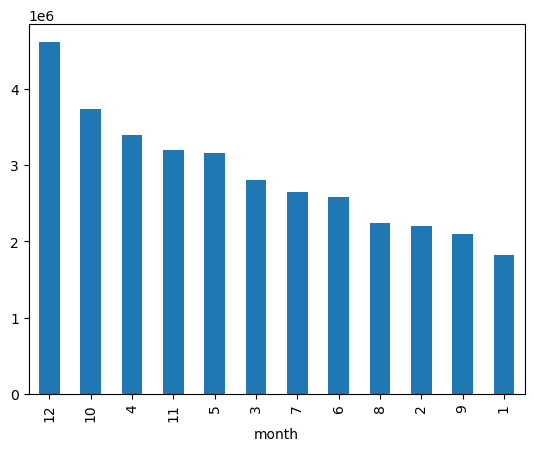

In [84]:
ddf.groupby('month')['sales'].sum().sort_values(ascending = False).plot.bar()

In [140]:
ddf['Purchase Address'].str.split(',').str[2].str[:3]

0          TX
2          MA
3          CA
4          CA
5          CA
         ... 
186845     CA
186846     CA
186847     CA
186848     CA
186849     CA
Name: Purchase Address, Length: 185950, dtype: object

In [142]:
ddf['city']=ddf['Purchase Address'].str.split(',').str[1]
ddf['state'] = ddf['Purchase Address'].str.split(',').str[2].str[:3]
ddf.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\3663668027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['city']=ddf['Purchase Address'].str.split(',').str[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\3663668027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['state'] = ddf['Purchase Address'].str.split(',').str[2].str[:3]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [146]:
ddf.groupby(['city','state'])['sales'].sum().sort_values(ascending=False)

city           state
San Francisco  CA       8262203.91
Los Angeles    CA       5452570.80
New York City  NY       4664317.43
Boston         MA       3661642.01
Atlanta        GA       2795498.58
Dallas         TX       2767975.40
Seattle        WA       2747755.48
Portland       OR       1870732.34
Austin         TX       1819581.75
Portland       ME        449758.27
Name: sales, dtype: float64

<Axes: xlabel='city,state'>

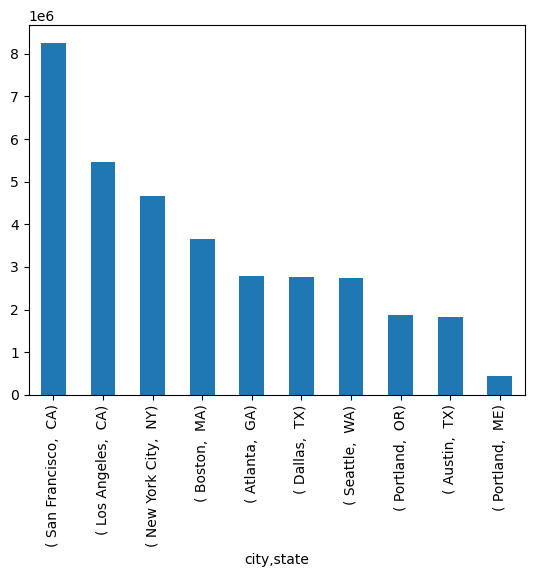

In [148]:
ddf.groupby(['city','state'])['sales'].sum().sort_values(ascending=False).plot.bar()

<Axes: ylabel='sales'>

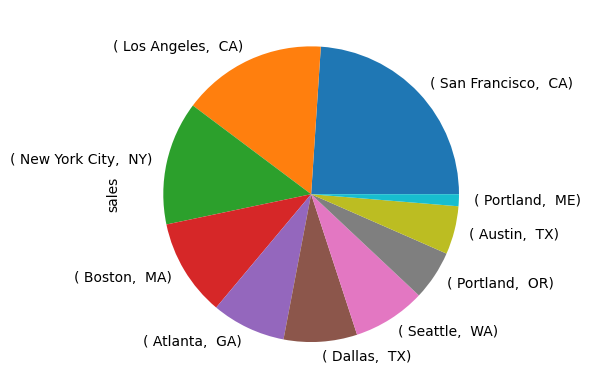

In [150]:
import matplotlib.pyplot as plt
ddf.groupby(['city','state'])['sales'].sum().sort_values(ascending=False).plot.pie()

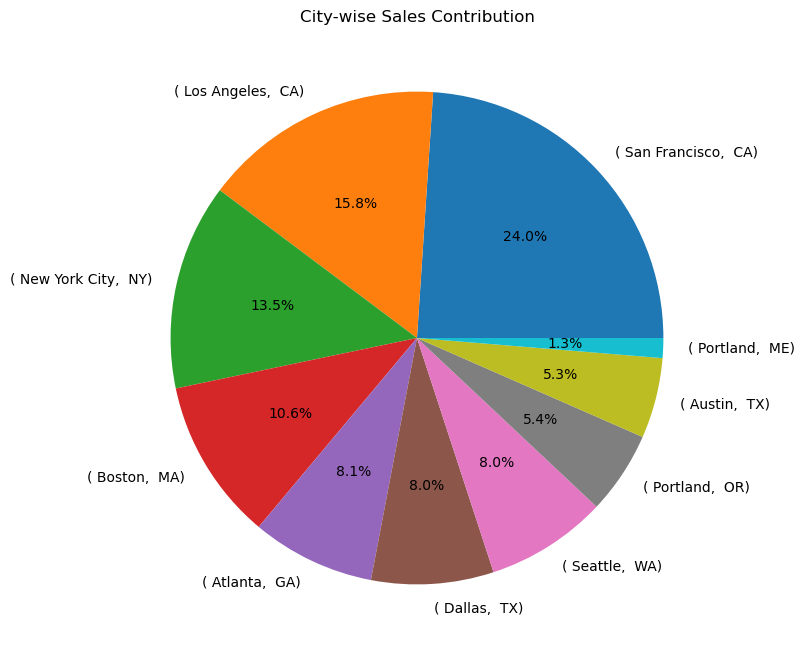

In [152]:
sales_by_city = ddf.groupby(['city','state'])['sales'].sum().sort_values(ascending=False)

# Plot Pie Chart
sales_by_city.plot.pie(
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    figsize=(8, 8),     # Set figure size
    title='City-wise Sales Contribution', 
    ylabel=''           # Remove y-label for better appearance
)
plt.show()

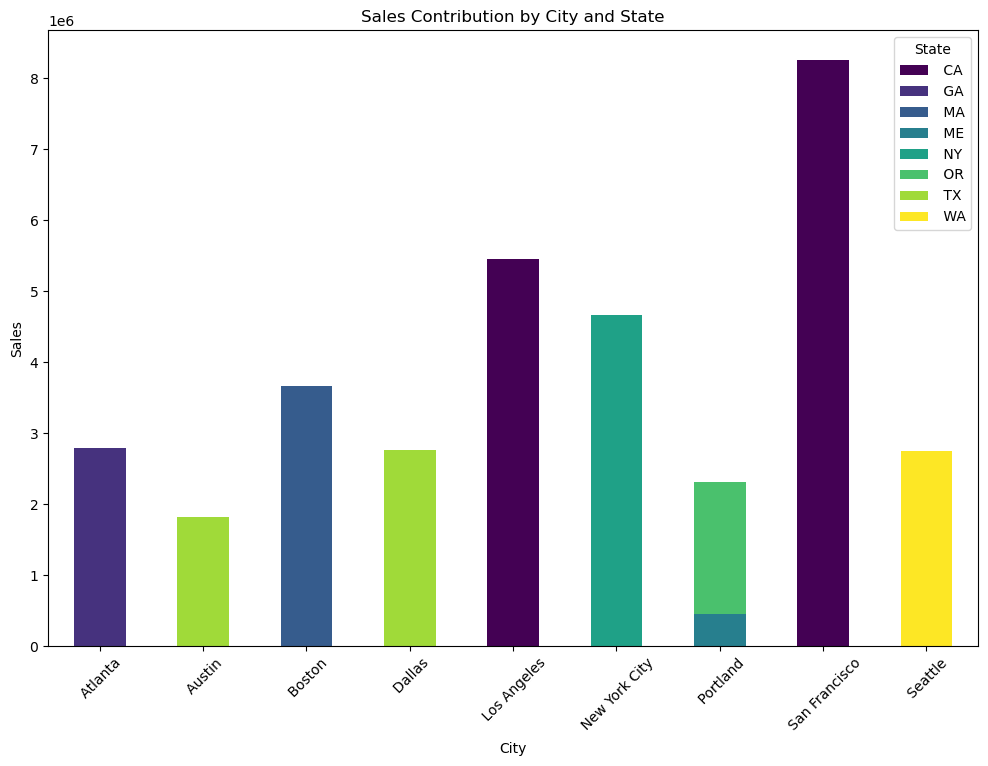

In [156]:
import seaborn as sns

# Reset index for seaborn compatibility
sales_by_city_df = sales_by_city.reset_index()

# Pivot data for stacking
pivot_data = sales_by_city_df.pivot(index='city', columns='state', values='sales')

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')
plt.title('Sales Contribution by City and State')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\4210509254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


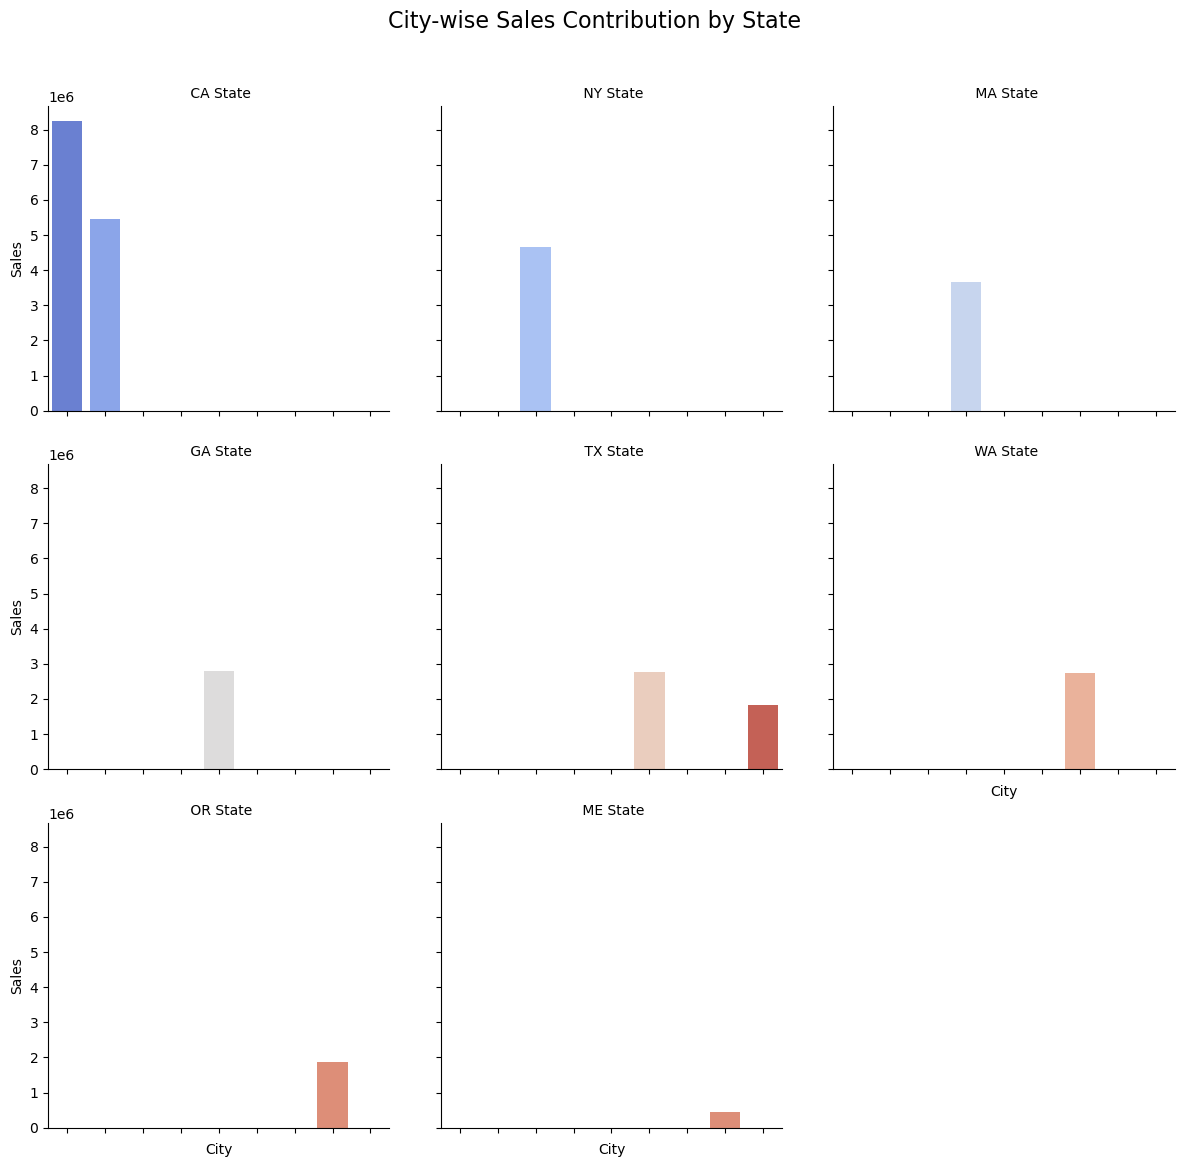

In [158]:
# FacetGrid bar plot
g = sns.catplot(
    data=sales_by_city_df,
    x='city',
    y='sales',
    col='state',
    kind='bar',
    col_wrap=3,
    height=4,
    aspect=1,
    palette='coolwarm'
)

g.set_titles("{col_name} State")
g.set_xticklabels(rotation=45)
g.set_axis_labels("City", "Sales")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('City-wise Sales Contribution by State', fontsize=16)
plt.show()


In [160]:
ddf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [166]:
ddf['Order Date'] = pd.to_datetime(ddf['Order Date'], errors='coerce')
ddf.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\2577069326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Order Date'] = pd.to_datetime(ddf['Order Date'], errors='coerce')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [168]:
ddf['hour'] = ddf['Order Date'].dt.hour
ddf['minute'] = ddf['Order Date'].dt.minute
ddf.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\3963714513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['hour'] = ddf['Order Date'].dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\3963714513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['minute'] = ddf['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


In [170]:
ddf.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'sales', 'city', 'state', 'hour',
       'minute'],
      dtype='object')

In [176]:
ddf.groupby('hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,minute
hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\3749709331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='Order ID', data=purchase_count_by_hour, palette='viridis')


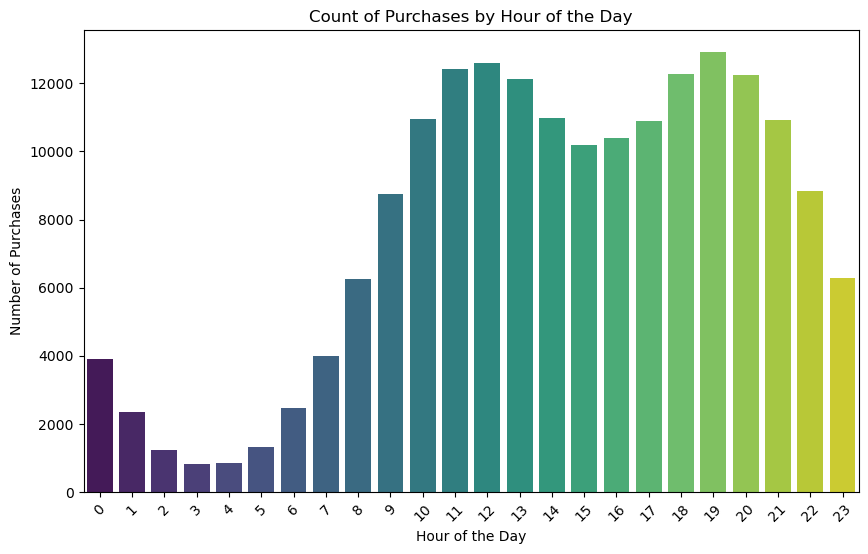

In [178]:
# Group by 'hour' and count the number of records (orders) per hour
purchase_count_by_hour = ddf.groupby('hour').count()['Order ID'].reset_index()

# Plot the count of purchases per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Order ID', data=purchase_count_by_hour, palette='viridis')

plt.title('Count of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


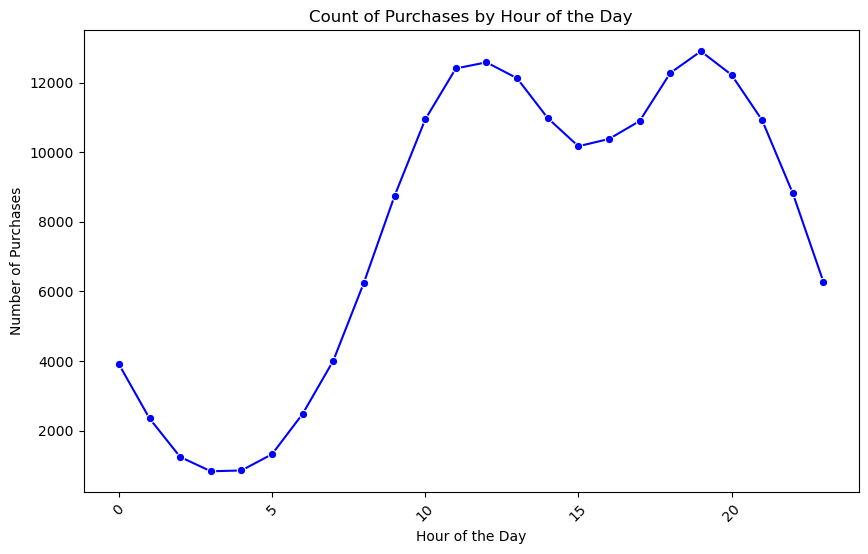

In [180]:
# Group by 'hour' and count the number of records (orders) per hour
purchase_count_by_hour = ddf.groupby('hour').count()['Order ID'].reset_index()

# Plot the count of purchases per hour as a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='Order ID', data=purchase_count_by_hour, marker='o', color='b')

plt.title('Count of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


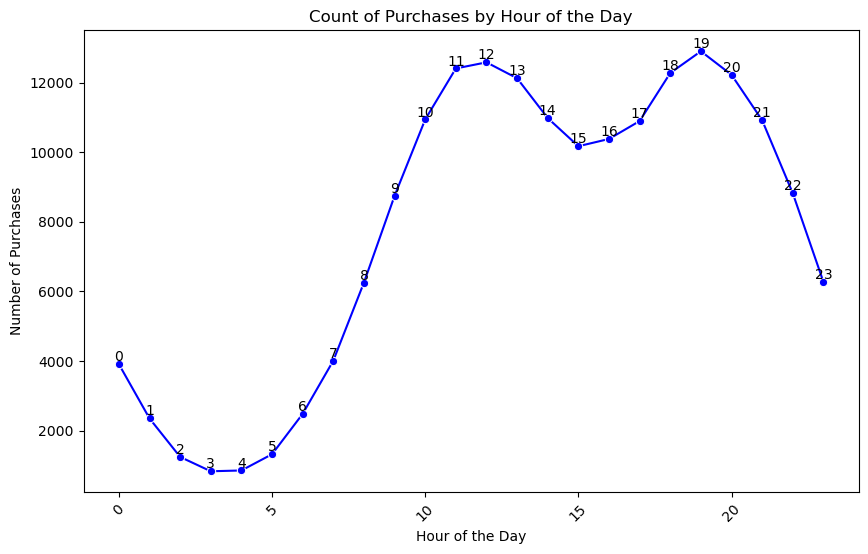

In [182]:
# Group by 'hour' and count the number of records (orders) per hour
purchase_count_by_hour = ddf.groupby('hour').count()['Order ID'].reset_index()

# Plot the count of purchases per hour as a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='Order ID', data=purchase_count_by_hour, marker='o', color='b')

# Annotate each point with the hour value
for i in range(len(purchase_count_by_hour)):
    plt.text(purchase_count_by_hour['hour'].iloc[i], 
             purchase_count_by_hour['Order ID'].iloc[i], 
             str(purchase_count_by_hour['hour'].iloc[i]), 
             color='black', 
             ha='center', 
             va='bottom')

# Set plot title and labels
plt.title('Count of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


In [184]:
ddf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


# I want to get which product is orderdd most in pairs or together

# the idea is we will take the duplicates in a new df and kepp all the duplicated and then use the transsform 
# here 

In [243]:
new_df = ddf[ddf['Order ID'].duplicated(keep=False)]
new_df.head(10) 
# the resason to do the keep = False is to get all the dupluctes 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,42
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,42
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,CA,17,0
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,CA,17,0
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,NY,11,7
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City,NY,11,7


In [249]:
new_df.groupby('Order ID')['Product'].transform(lambda x:",".join(x))

3                             Google Phone,Wired Headphones
4                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
19                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
                                ...                        
186792         34in Ultrawide Monitor,AA Batteries (4-pack)
186803              Wired Headphones,AAA Batteries (4-pack)
186804              Wired Headphones,AAA Batteries (4-pack)
186841                    Google Phone,USB-C Charging Cable
186842                    Google Phone,USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [251]:
new_df['Produ Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x:",".join(x))
new_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\301691330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Produ Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x:",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute,Produ Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute
Produ Grouped,,,,,,,,,,,,
"20in Monitor,20in Monitor",6,6,6,6,6,6,6,6,6,6,6,6
"20in Monitor,27in FHD Monitor",4,4,4,4,4,4,4,4,4,4,4,4
"20in Monitor,34in Ultrawide Monitor",2,2,2,2,2,2,2,2,2,2,2,2
"20in Monitor,AA Batteries (4-pack)",12,12,12,12,12,12,12,12,12,12,12,12
"20in Monitor,AAA Batteries (4-pack)",6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
"iPhone,USB-C Charging Cable",24,24,24,24,24,24,24,24,24,24,24,24
"iPhone,Vareebadd Phone",6,6,6,6,6,6,6,6,6,6,6,6
"iPhone,Wired Headphones",722,722,722,722,722,722,722,722,722,722,722,722


In [259]:
import itertools
import pandas as pd

# Assuming 'new_df' has already been created with the concatenated product strings
# Step 1: Generate product pairs for each order
def get_product_pairs(products_str):
    # Split the products into a list
    products = products_str.split(',')
    # Generate all unique pairs of products
    return list(itertools.combinations(sorted(set(products)), 3))

# Step 2: Apply the function to create pairs for each order
new_df['Product Pairs'] = new_df['Produ Grouped'].apply(get_product_pairs)

# Step 3: Explode the pairs into individual rows so we can count their frequency
exploded_pairs = new_df.explode('Product Pairs')

# Step 4: Count the frequency of each product pair
pair_counts = exploded_pairs['Product Pairs'].value_counts().reset_index()
pair_counts.columns = ['Product Pair', 'Count']

# Display the most common product pairs
print(pair_counts.head())


                                        Product Pair  Count
0  (Google Phone, USB-C Charging Cable, Wired Hea...    270
1  (Lightning Charging Cable, Wired Headphones, i...    196
2  (Apple Airpods Headphones, Lightning Charging ...    146
3  (Bose SoundSport Headphones, Google Phone, USB...    109
4  (USB-C Charging Cable, Vareebadd Phone, Wired ...    101


C:\Users\DELL\AppData\Local\Temp\ipykernel_4332\293794777.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Product Pairs'] = new_df['Produ Grouped'].apply(get_product_pairs)


In [261]:
pair_counts

,Product Pair,Count
0,"(Google Phone, USB-C Charging Cable, Wired Hea...",270
1,"(Lightning Charging Cable, Wired Headphones, i...",196
2,"(Apple Airpods Headphones, Lightning Charging ...",146
3,"(Bose SoundSport Headphones, Google Phone, USB...",109
4,"(USB-C Charging Cable, Vareebadd Phone, Wired ...",101
5,"(Apple Airpods Headphones, Wired Headphones, i...",86
6,"(Bose SoundSport Headphones, Google Phone, Wir...",75
7,"(Bose SoundSport Headphones, USB-C Charging Ca...",50
8,"(Bose SoundSport Headphones, USB-C Charging Ca...",20
9,"(Apple Airpods Headphones, Lightning Charging ...",17


In [267]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Sample data

df = pd.DataFrame(new_df)

# Combine products by Order ID
df['Product Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df = df.drop_duplicates(subset=['Order ID'])

# Extract product pairs and count occurrences
count = Counter()

for products in df['Product Grouped']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

# Display the most common pairs
print(count.most_common())


[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92), (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81), (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80), (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77), (('Apple Airpods Headphones', 'Wired Headphones'), 69), (('Lightning Charging Cable', 'USB-C Charging Cable'), 58), (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55), (('Lightning Charging Cable', 'Lightning Charging Cable'), 54), (('Bose SoundSport Headphones', 'Wired Headphones'), 53), (('AA Batteries (4-pack)'

In [273]:
ddf.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

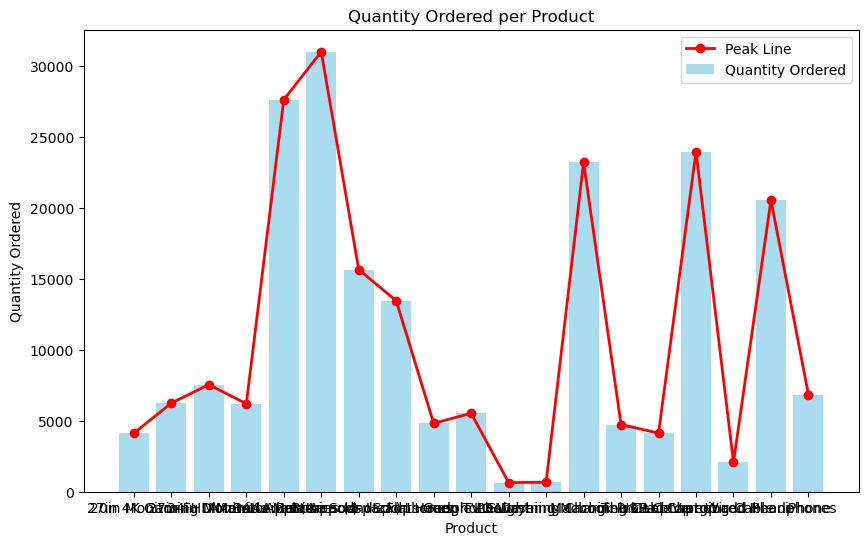

In [275]:
product_summary = ddf.groupby('Product')['Quantity Ordered'].sum()
plt.figure(figsize=(10, 6))
bars = plt.bar(product_summary.index, product_summary.values, color='skyblue', alpha=0.7, label='Quantity Ordered')

# Adding a line plot through the bar peaks
plt.plot(product_summary.index, product_summary.values, color='red', marker='o', linewidth=2, label='Peak Line')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.legend()

# Display the plot
plt.show()

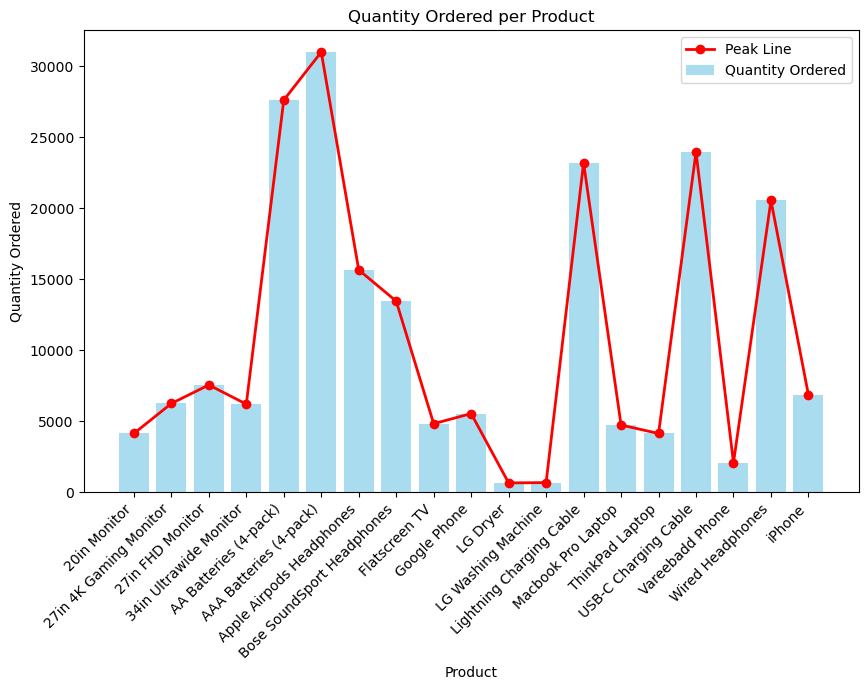

In [277]:
product_summary = ddf.groupby('Product')['Quantity Ordered'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(product_summary.index, product_summary.values, color='skyblue', alpha=0.7, label='Quantity Ordered')

# Adding a line plot through the bar peaks
plt.plot(product_summary.index, product_summary.values, color='red', marker='o', linewidth=2, label='Peak Line')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.legend()

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, align to the right

# Display the plot
plt.show()


NameError: name 'prices' is not defined

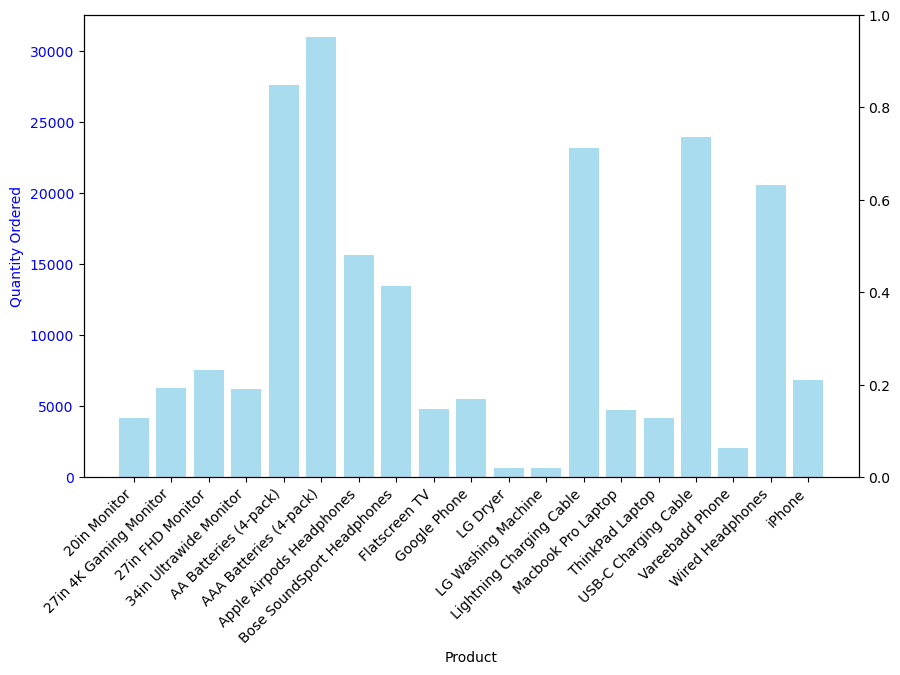

In [279]:
product_summary = ddf.groupby('Product')['Quantity Ordered'].sum()

# Create the figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar chart on the first y-axis
bars = ax1.bar(product_summary.index, product_summary.values, color='skyblue', alpha=0.7, label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(product_summary.index, prices, color='red', marker='o', linewidth=2, label='Price')
ax2.set_ylabel('Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
plt.title('Quantity Ordered and Prices per Product')
fig.tight_layout()  # Adjust layout to prevent overlap
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # Combine legends from both axes

# Display the plot
plt.show()
